In [12]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [8]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [12]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 48979 images belonging to 9 classes.


In [5]:
validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 29862 images belonging to 9 classes.


In [6]:
shape_model = Sequential()

shape_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
shape_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
shape_model.add(MaxPooling2D(pool_size=(2, 2)))
shape_model.add(Dropout(0.25))

shape_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
shape_model.add(MaxPooling2D(pool_size=(2, 2)))
shape_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
shape_model.add(MaxPooling2D(pool_size=(2, 2)))
shape_model.add(Dropout(0.25))

shape_model.add(Flatten())
shape_model.add(Dense(1024, activation='relu'))
shape_model.add(Dropout(0.5))
shape_model.add(Dense(9, activation='softmax'))


In [8]:
shape_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


C:\Users\xps\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
# Train the neural network/model
shape_model_info = shape_model.fit_generator(
        train_generator,
        steps_per_epoch=48979  // 128,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=29862  // 128)


Epoch 1/20


C:\Users\xps\AppData\Local\Temp/ipykernel_12040/4235061225.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  shape_model_info = shape_model.fit_generator(


382/382 [==============================] - 334s 873ms/step - loss: 2.1724 - accuracy: 0.1309 - val_loss: 2.1527 - val_accuracy: 0.1499
Epoch 2/20
382/382 [==============================] - 235s 616ms/step - loss: 2.0606 - accuracy: 0.1880 - val_loss: 1.9961 - val_accuracy: 0.2157
Epoch 3/20
382/382 [==============================] - 198s 518ms/step - loss: 1.9340 - accuracy: 0.2396 - val_loss: 1.8513 - val_accuracy: 0.2757
Epoch 4/20
382/382 [==============================] - 182s 476ms/step - loss: 1.8434 - accuracy: 0.2722 - val_loss: 1.7878 - val_accuracy: 0.2898
Epoch 5/20
382/382 [==============================] - 172s 450ms/step - loss: 1.7445 - accuracy: 0.3107 - val_loss: 1.6013 - val_accuracy: 0.3587
Epoch 6/20
382/382 [==============================] - 181s 475ms/step - loss: 1.6566 - accuracy: 0.3404 - val_loss: 1.5964 - val_accuracy: 0.3631
Epoch 7/20
382/382 [==============================] - 168s 440ms/step - loss: 1.5946 - accuracy: 0.3629 - val_loss: 1.6341 - val_accura

In [11]:
shape_model.save_weights('shape.h5')

In [12]:
shape_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

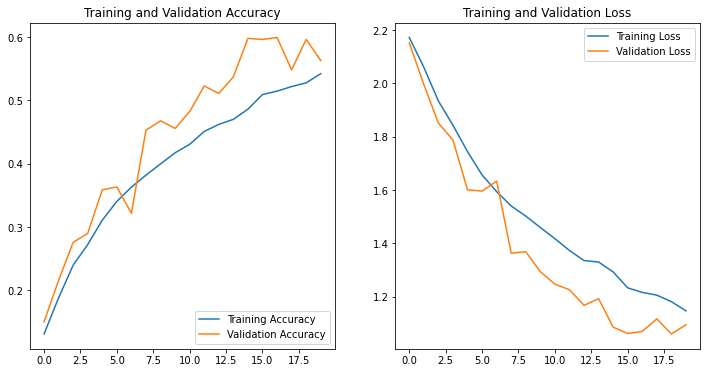

In [19]:
#showing results and model accuracy 
import matplotlib.pyplot as plt
acc = shape_model_info.history['accuracy']
val_acc = shape_model_info.history['val_accuracy']

loss = shape_model_info.history['loss']
val_loss = shape_model_info.history['val_loss']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
INIT_LR = 1e-4
EPOCHS = 30
BS = 64

In [14]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [3]:

train_directory ="C:/Users/xps/Desktop/mouth/train"
test_directory = "C:/Users/xps/Desktop/mouth/test"
CATEGORIES = ['laugh','silent','sleep','speech']


In [4]:
data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(train_directory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

In [5]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [57]:
print(data.shape
     )

(2768, 224, 224, 3)


In [66]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    
    
    )

In [7]:
valid_data = []
valid_labels = []

for category in CATEGORIES:
    path = os.path.join(test_directory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)

        valid_data.append(image)
        valid_labels.append(category)

In [8]:
lb = LabelBinarizer()
valid_labels = lb.fit_transform(valid_labels)
valid_labels = to_categorical(valid_labels)

valid_data = np.array(valid_data, dtype="float32")
valid_labels = np.array(valid_labels)

In [85]:
from tensorflow.keras.applications import MobileNetV2
mobile_basemodel = MobileNetV2(include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [86]:
headModel = mobile_basemodel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)

In [87]:
model = Model(inputs=mobile_basemodel.input, outputs=headModel)

In [88]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [89]:
# Freezing original layers
for layer in model.layers[:-1]:
    layer.trainable = False

In [90]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
try:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [91]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
        aug.flow(data, labels, batch_size=BS),
        steps_per_epoch=2768 // 32,
        validation_data=(valid_data, valid_labels),
        validation_steps= 1236// 32,
            epochs=20)


[INFO] training head...
Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/remove_squeezable_dimensions/Squeeze' defined at (most recent call last):
    File "C:\Users\xps\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\xps\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\xps\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\xps\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\xps\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\xps\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\xps\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\xps\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\xps\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\xps\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\xps\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\xps\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\xps\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\xps\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\xps\AppData\Local\Temp/ipykernel_7936/1112690307.py", line 3, in <module>
      H = model.fit(
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\losses.py", line 242, in call
      y_pred, y_true = losses_utils.squeeze_or_expand_dimensions(y_pred, y_true)
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\utils\losses_utils.py", line 187, in squeeze_or_expand_dimensions
      y_true, y_pred = remove_squeezable_dimensions(
    File "C:\Users\xps\anaconda3\lib\site-packages\keras\utils\losses_utils.py", line 130, in remove_squeezable_dimensions
      labels = tf.squeeze(labels, [-1])
Node: 'categorical_crossentropy/remove_squeezable_dimensions/Squeeze'
Can not squeeze dim[2], expected a dimension of 1, got 2
	 [[{{node categorical_crossentropy/remove_squeezable_dimensions/Squeeze}}]] [Op:__inference_train_function_99715]

In [ ]:
model.save('res_mouth.h5')

In [ ]:
# compile model
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
        metrics=["accuracy"])

In [20]:
model.save('new_mouth.h5')

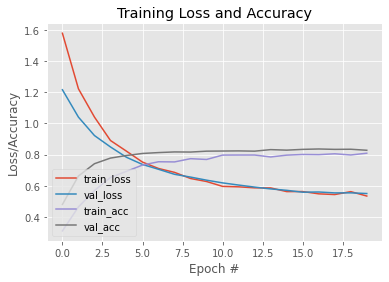

In [62]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [7]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
classifier =load_model('mouth.h5')

In [ ]:
face_detection=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    if ret== False :
        break
    class_labels=['laugh','sleep','speech','silent']
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_detection.detectMultiScale(gray,1.3,4)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = frame[y+120:y+h+10,x+30:x+w-30]
        roi_gray = cv2.resize(roi_gray,(64,64),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            
            
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
from flask import Flask,render_template,Response,request
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import imutils
import cv2
import numpy as np
%tb
import imutils
app = Flask(__name__)
def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	#print(detections.shape)

	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

# load our serialized face detector model from disk
prototxtPath = r"C:/Users/xps/Desktop/computer vision/mask project/face_detector/deploy.prototxt"
weightsPath = r"C:/Users/xps/Desktop/computer vision/mask project/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)
path="C:/Users/xps/Desktop/computer vision/mask project/state.model"
# load the face mask detector model from disk
maskNet = load_model("state.model")
camera=cv2.VideoCapture(0)
def mask():
    print("[INFO] starting video stream...")
    #vs = VideoStream(src=0).start()
    # loop over the frames from the video stream
    while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
   
        success,frame = camera.read()
        if not success:
            break
        else:
            frame = imutils.resize(frame, width=800)

            # detect faces in the frame and determine if they are wearing a
            # face mask or not
            (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

            # loop over the detected face locations and their corresponding
            # locations
            for (box, pred) in zip(locs, preds):
                # unpack the bounding box and predictions
                (startX, startY, endX, endY) = box
                (silent, speak) = pred
                # determine the class label and color we'll use to draw
                # the bounding box and text
                label = "silent" if silent > speak else "speak"
                color = (0, 0, 255) if label == "speak" else (0, 255, 0)
                # include the probability in the label
                label = "{}: {:.2f}%".format(label, max(silent, speak) * 100)


                # display the label and bounding box rectangle on the output
                # frame
                cv2.putText(frame, label, (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
                cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)
            cv2.imshow('Emotion Detector',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                   break
mask()
camera.release()
cv2.destroyAllWindows()
           